# Simple Network


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                   [8.9], [5.2], [8.59], [2.1], [8], 
                   [10], [4.5], [6], [4]],
                  dtype = np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                  dtype = np.float32)

<function matplotlib.pyplot.show(close=None, block=None)>

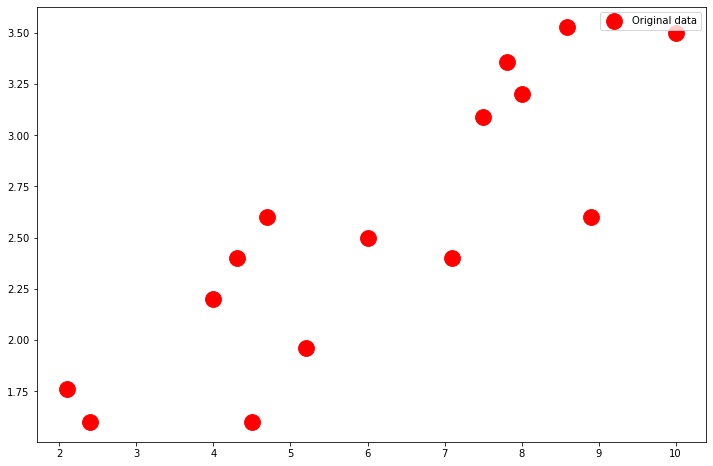

In [4]:
plt.figure(figsize =(12,8))

plt. scatter(x_train, y_train, label = 'Original data', s=250, c= 'r')

plt.legend()
plt.show

In [5]:
import torch

In [6]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('require_grad for X_train: ', X_train.requires_grad)
print('require_grad for Y_train: ', Y_train.requires_grad)

require_grad for X_train:  False
require_grad for Y_train:  False


In [7]:
input_size = 1
hidden_size = 1
output_size = 1

In [59]:
# Manual layer construction
w1 = torch.rand(input_size, hidden_size,
               requires_grad = True)
w1.shape

torch.Size([1, 1])

In [60]:
w2 = torch.rand(hidden_size, output_size,
               requires_grad = True)
w2.shape

torch.Size([1, 1])

In [61]:
learning_rate = 1e-6

In [62]:
for iter in range (1,3000):
    y_pred = X_train.mm(w1).mm(w2) #Matrix mult
    loss = (y_pred - Y_train).pow(2).sum() #all errors summed
    
    if iter % 50 == 0:
        print(iter, loss.item())
    
    loss.backward() # calculate grads
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad #lr
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()# Reset

50 36.33414077758789
100 34.50340270996094
150 32.7406120300293
200 31.045976638793945
250 29.419469833374023
300 27.860925674438477
350 26.370014190673828
400 24.94620704650879
450 23.58881187438965
500 22.296945571899414
550 21.06957244873047
600 19.905471801757812
650 18.803251266479492
700 17.761445999145508
750 16.77838134765625
800 15.852293014526367
850 14.981314659118652
900 14.163508415222168
950 13.396867752075195
1000 12.679296493530273
1050 12.008719444274902
1100 11.3829927444458
1150 10.799978256225586
1200 10.257554054260254
1250 9.753602027893066
1300 9.286026954650879
1350 8.852794647216797
1400 8.451891899108887
1450 8.08139419555664
1500 7.739382743835449
1550 7.424047946929932
1600 7.133645534515381
1650 6.866499423980713
1700 6.6210126876831055
1750 6.395650386810303
1800 6.188978672027588
1850 5.999625205993652
1900 5.826295375823975
1950 5.6677727699279785
2000 5.522919654846191
2050 5.390664577484131
2100 5.269997596740723
2150 5.159996509552002
2200 5.059786796

In [63]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.7469]], requires_grad=True)
w2:  tensor([[0.5078]], requires_grad=True)


In [64]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [65]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.7826],
        [0.9102],
        [2.8445],
        [2.6928],
        [1.6308],
        [2.9643],
        [3.3755],
        [1.9722],
        [3.2579],
        [0.7965],
        [3.0341],
        [3.7927],
        [1.7067],
        [2.2756],
        [1.5171]], grad_fn=<MmBackward0>)

In [57]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.864206  ],
       [0.95193505],
       [2.9747968 ],
       [2.8161411 ],
       [1.7055502 ],
       [3.1001348 ],
       [3.530092  ],
       [2.0625257 ],
       [3.4071338 ],
       [0.832943  ],
       [3.1731167 ],
       [3.9663959 ],
       [1.7848781 ],
       [2.3798375 ],
       [1.5865583 ]], dtype=float32)

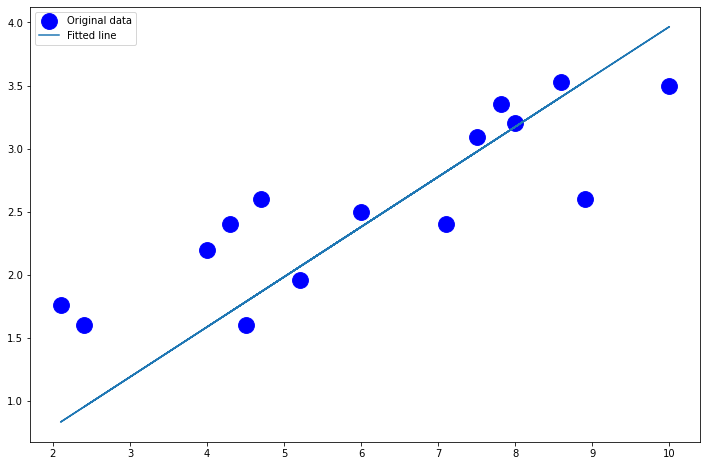

In [58]:
plt.figure(figsize = (12,8))

plt.scatter(x_train, y_train, label = 'Original data', s = 250, c = 'b')

plt.plot(x_train,predicted, label = 'Fitted line')

plt.legend()

plt.show()